In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df =pd.read_csv("Battery_RUL.csv")

In [3]:
df.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


In [4]:
df.isnull().sum()

Cycle_Index                  0
Discharge Time (s)           0
Decrement 3.6-3.4V (s)       0
Max. Voltage Dischar. (V)    0
Min. Voltage Charg. (V)      0
Time at 4.15V (s)            0
Time constant current (s)    0
Charging time (s)            0
RUL                          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [6]:
df.columns


Index(['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)',
       'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)',
       'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)',
       'RUL'],
      dtype='object')

In [7]:
# Let's describe the data
df.describe()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,556.155005,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172
std,322.378480,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514
min,1.000000,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000
25%,271.000000,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000
50%,560.000000,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000
75%,833.000000,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000
max,1134.000000,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000


In [8]:
# Correlation
df.corr()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
Cycle_Index,1.000000,-0.011925,-0.012090,-0.782859,0.759850,-0.176486,-0.040622,-0.018305,-0.999756
Discharge Time (s),-0.011925,1.000000,0.444984,0.349161,-0.239410,0.776720,0.912536,0.935544,0.011957
Decrement 3.6-3.4V (s),-0.012090,0.444984,1.000000,0.199470,-0.132765,0.477091,0.343228,0.371610,0.011998
Max. Voltage Dischar. (V),-0.782859,0.349161,0.199470,1.000000,-0.718182,0.446070,0.286886,0.269009,0.782800
Min. Voltage Charg. (V),0.759850,-0.239410,-0.132765,-0.718182,1.000000,-0.344098,-0.216840,-0.200423,-0.759805
Time at 4.15V (s),-0.176486,0.776720,0.477091,0.446070,-0.344098,1.000000,0.568922,0.676859,0.176514
Time constant current (s),-0.040622,0.912536,0.343228,0.286886,-0.216840,0.568922,1.000000,0.953522,0.040675
Charging time (s),-0.018305,0.935544,0.371610,0.269009,-0.200423,0.676859,0.953522,1.000000,0.018299
RUL,-0.999756,0.011957,0.011998,0.782800,-0.759805,0.176514,0.040675,0.018299,1.000000


## Here You can see cycle_index is highly correlated, is this data. I do feel cycle index cause data leakage as it inversely related to RUL. So I will take it out here. I may need domain expert to have better insight!

In [9]:
# Exploratory Data Analysis
#sns.pairplot(df)

<AxesSubplot:>

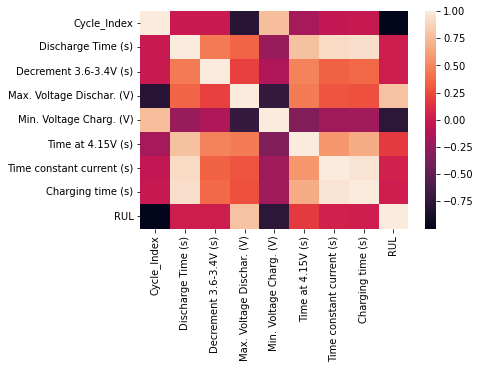

In [10]:
sns.heatmap(df.corr())

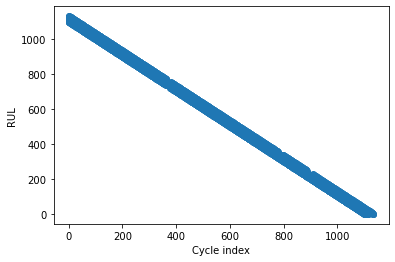

In [11]:
plt.scatter(df["Cycle_Index"],df["RUL"])
plt.xlabel("Cycle index")
plt.ylabel("RUL")
plt.show()

<AxesSubplot:xlabel='Discharge Time (s)', ylabel='RUL'>

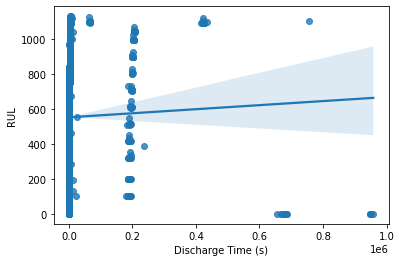

In [12]:
sns.regplot(x="Discharge Time (s)",y="RUL", data = df)

<AxesSubplot:xlabel='Charging time (s)', ylabel='RUL'>

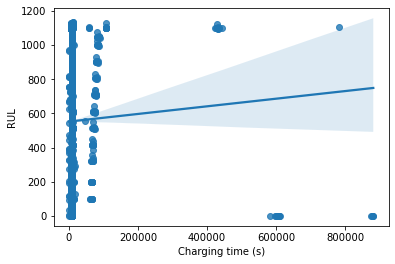

In [13]:
sns.regplot(x='Charging time (s)',y="RUL", data = df)

<AxesSubplot:xlabel='Max. Voltage Dischar. (V)', ylabel='RUL'>

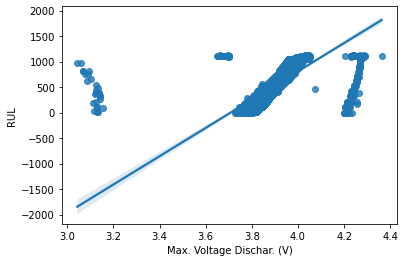

In [14]:
sns.regplot(x='Max. Voltage Dischar. (V)',y="RUL", data = df)

In [15]:
df1 = df.drop(["Cycle_Index"],axis=1,inplace=True)
df1

In [16]:
# Split the data into dependent and independdent data
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [17]:
x

,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s)
0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82
1,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35
2,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38
3,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81
4,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65
...,...,...,...,...,...,...,...
15059,770.44,179.523810,3.773,3.742,922.775,1412.38,6678.88
15060,771.12,179.523810,3.773,3.744,915.512,1412.31,6670.38
15061,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12
15062,773.88,162.374667,3.763,3.839,539.375,1148.00,7660.62


In [18]:
# Split the data i to train test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size = 0.3,random_state =1)

In [19]:
# Feature scaalling
# stardardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(x_train)

In [21]:
X_test = scaler.transform(x_test)

## Model Training

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [23]:
lr.fit(X_train,y_train)

LinearRegression()

In [24]:
# Print the cofficient and intercept
print(lr.coef_)
print(lr.intercept_)

[-270.29390369   -6.92810629  203.49004057 -115.65946271   36.63628711
   80.14612146   83.97142609]
555.5588012139618


In [25]:
# On which param the model has been train
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [26]:
## Prediction on the test data 
lr_pre = lr.predict(X_test)
lr_pre

array([519.18719164, 840.48303715, 591.96410122, ..., 937.14558608,
       322.03441364, 534.31743801])

In [27]:
y_test

10363     429
13151     900
6984      572
12145     823
1312      870
         ... 
15010      53
10377     415
6573     1001
11716     147
12316     630
Name: RUL, Length: 4520, dtype: int64

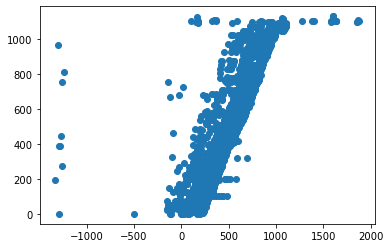

In [28]:
## Plot a scatter plot for the prediction
plt.scatter(lr_pre,y_test)

In [29]:
# Residuals(Errors)
res = y_test-lr_pre
res

10363    -90.187192
13151     59.516963
6984     -19.964101
12145    149.918896
1312     166.926344
            ...    
15010    -74.171419
10377   -102.507852
6573      63.854414
11716   -175.034414
12316     95.682562
Name: RUL, Length: 4520, dtype: float64

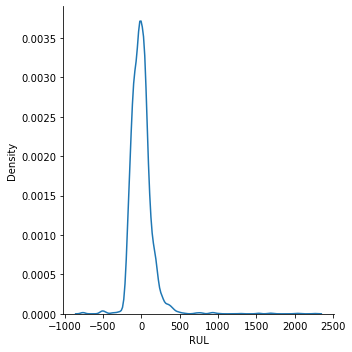

In [30]:
# Plot the residuals
sns.displot(res,kind="kde")

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,lr_pre))
print(mean_squared_error(y_test,lr_pre))
print(np.sqrt(mean_squared_error(y_test,lr_pre)))

93.64990610780704
22290.858924839424
149.3012355100902


## R Square  and Adjusted RSquare

In [32]:
from sklearn.metrics import r2_score
score = r2_score(y_test,lr_pre)
print(score)

0.7851479603275915


## Pickling the Model file for Deployment

In [33]:
import pickle

In [34]:
pickle.dump(lr,open("regmodel.pkl","wb"))

In [35]:
# load the model using pickle
pic_model = pickle.load(open("regmodel.pkl","rb"))

In [37]:
# Predict using pickle file.
pic_model.predict(X_test)

array([519.18719164, 840.48303715, 591.96410122, ..., 937.14558608,
       322.03441364, 534.31743801])